In [1]:
import sys
import json
sys.path.append("../")
from src.prediction_utils import greedy_prediction_NIC
from src.data_utils import load_captions, make_train_test_images, encode_images
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# Loading data
CAPTIONS_PATH = "../data/Flickr_Data/Flickr_TextData/Flickr8k.token.txt"
IMAGES_PATH = "../data/Flickr_Data/Images/"
captions = load_captions(CAPTIONS_PATH)
train, test, train_images, test_images = make_train_test_images(CAPTIONS_PATH, IMAGES_PATH)

# Encoding images
test_features = encode_images(test_images[:5], IMAGES_PATH)

100%|██████████| 5/5 [00:00<00:00,  6.12it/s]


In [17]:
# Loading tokenizers
with open("../tokenizers/NIC/index_to_word.json") as file:
    index_to_word = json.load(file)

with open("../tokenizers/NIC/word_to_index.json") as file:
    word_to_index = json.load(file)


In [18]:
# Loading model
model = tf.keras.models.load_model("../models/NIC.h5")

# setting max_length
max_length = 38

In [30]:
test_id = list(test_features.keys())[4]

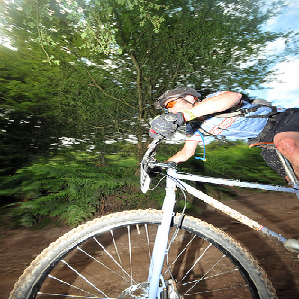

In [31]:
img = tf.keras.preprocessing.image.load_img(IMAGES_PATH + test_id, target_size=(299, 299))
img

In [32]:
greedy_prediction_NIC(test_features[test_id].reshape(1, -1), word_to_index, index_to_word, max_length, model)

'a looking in a grassy pole is painting a waiting collar the'